In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
import numpy as np

In [5]:
# Input data as a string
data_str = """numdata;type;bubble;insertion;selection;shell
0;ord;10171.763100;0.315400;10652.443800;4.791800
0;inv;19108.409900;0.315500;10388.648600;4.757900
0;rdm;27584.932700;0.307100;10266.380400;4.657200
1;ord;39000.840500;0.645300;41611.279900;10.406200
1;inv;73155.287400;0.614100;40573.370000;9.895100
1;rdm;109988.631600;0.675400;41186.754500;10.189700
2;ord;90782.703200;0.962000;92964.179200;16.267400
2;inv;176002.446100;2.021600;100863.029800;23.907300
2;rdm;254924.151200;0.977400;92685.983800;16.308100
3;ord;263123.504700;1.586000;268242.374200;28.844100
3;inv;469359.085700;2.134900;269956.324600;27.911300
3;rdm;678664.666200;1.583700;254559.773700;28.743800
4;ord;995753.362900;4.210000;1173260.909900;57.111600
4;inv;1818610.691100;6.900400;1008520.720800;59.131200
4;rdm;2666822.887600;3.426000;1055703.081900;57.209900"""

# Read data into a DataFrame
data_df = pd.read_csv(StringIO(data_str), delimiter=';')

numdata = [100000, 200000, 300000, 500000, 1000000]

data_df["numdata"] = data_df["numdata"].map(dict(enumerate(numdata)))

In [18]:
data_df

,numdata,type,bubble,insertion,selection,shell
0,100000,ord,1.017176e+04,0.3154,1.065244e+04,4.7918
1,100000,inv,1.910841e+04,0.3155,1.038865e+04,4.7579
2,100000,rdm,2.758493e+04,0.3071,1.026638e+04,4.6572
3,200000,ord,3.900084e+04,0.6453,4.161128e+04,10.4062
4,200000,inv,7.315529e+04,0.6141,4.057337e+04,9.8951
5,200000,rdm,1.099886e+05,0.6754,4.118675e+04,10.1897
6,300000,ord,9.078270e+04,0.9620,9.296418e+04,16.2674
7,300000,inv,1.760024e+05,2.0216,1.008630e+05,23.9073
8,300000,rdm,2.549242e+05,0.9774,9.268598e+04,16.3081
9,500000,ord,2.631235e+05,1.5860,2.682424e+05,28.8441


In [14]:
# Filtra e agrupa os dados pelo tipo de algoritmo
bubble_data = data_df[["numdata",'type', 'bubble']]
insertion_data = data_df[["numdata",'type', 'insertion']]
selection_data = data_df[["numdata",'type', 'selection']]
shell_data = data_df[["numdata",'type', 'shell']]

In [44]:
def thousands_formatter(x, pos):
    return f'{x / 1000:.0f}'

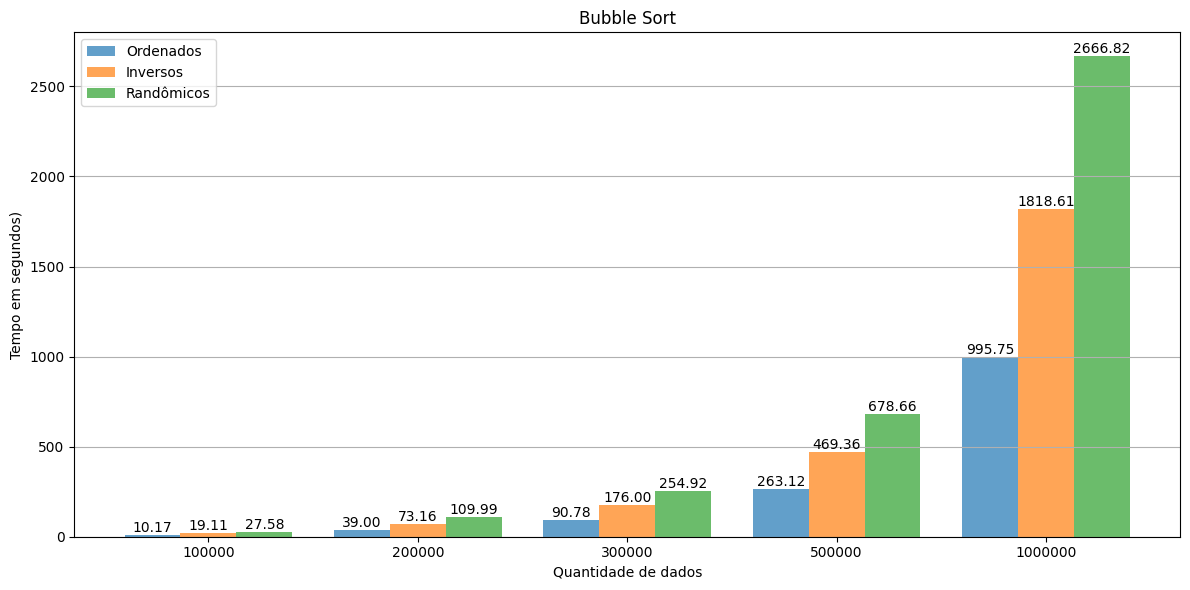

In [45]:
# Filtra o dataframe por tipo de dados
ord_data = bubble_data[bubble_data["type"] == 'ord']
inv_data = bubble_data[bubble_data["type"] == 'inv']
rdm_data = bubble_data[bubble_data["type"] == 'rdm']

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.4
group_spacing = 0.3

# Define o número de grupos. Cada grupo tem três colunas
num_groups = len(ord_data)
# Cria um array de x posições para os grupos
x_positions = np.arange(num_groups) * (3 * bar_width + group_spacing)

ax.bar(x_positions, ord_data['bubble'], width=bar_width, label='Ordenados', align='center', alpha=0.7)
ax.bar(x_positions + bar_width, inv_data['bubble'], width=bar_width, label='Inversos', align='center', alpha=0.7)
ax.bar(x_positions + 2 * bar_width, rdm_data['bubble'], width=bar_width, label='Randômicos', align='center', alpha=0.7)

ax.set_xlabel('Quantidade de dados')
ax.set_ylabel('Tempo em segundos)')
ax.set_title('Bubble Sort')

for x, y in zip(x_positions, ord_data['bubble']):
    ax.text(x, y, f'{y / 1000:.2f}', ha='center', va='bottom')

for x, y in zip(x_positions + bar_width, inv_data['bubble']):
    ax.text(x, y, f'{y / 1000:.2f}', ha='center', va='bottom')

for x, y in zip(x_positions + 2 * bar_width, rdm_data['bubble']):
    ax.text(x, y, f'{y / 1000:.2f}', ha='center', va='bottom')

ax.set_xticks(x_positions + bar_width)
ax.set_xticklabels(bubble_data["numdata"].unique())  # Set custom x-axis labels

# Use the custom tick formatter for the y-axis
ax.yaxis.set_major_formatter(thousands_formatter)

ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()

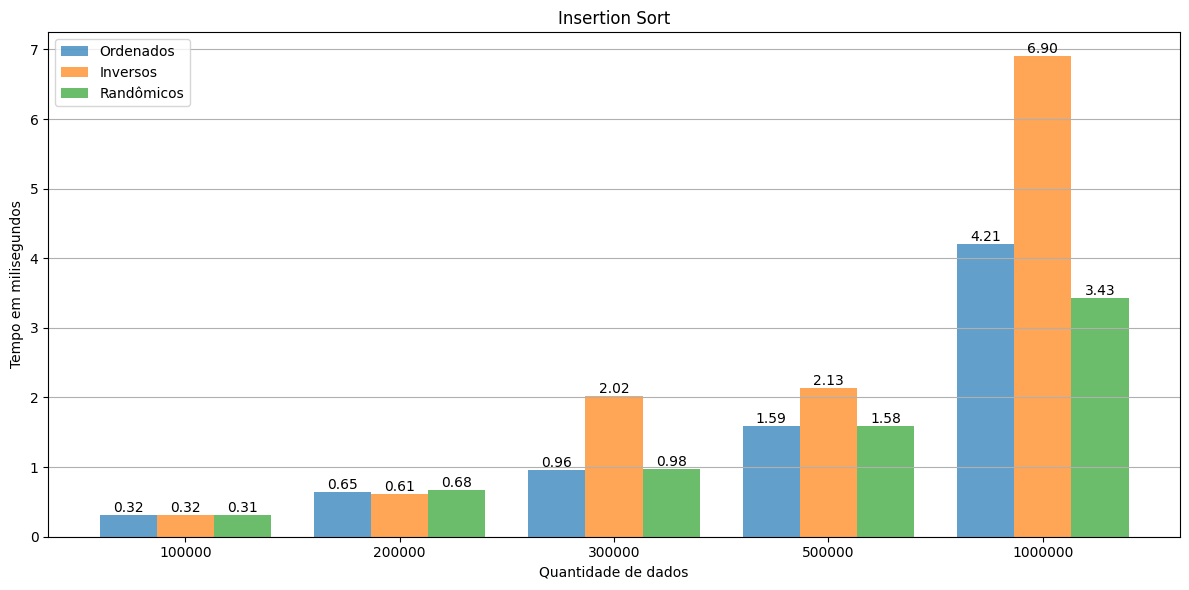

In [20]:
# Filtra o dataframe por tipo de dados
ord_data = insertion_data[insertion_data["type"] == 'ord']
inv_data = insertion_data[insertion_data["type"] == 'inv']
rdm_data = insertion_data[insertion_data["type"] == 'rdm']

plt.figure(figsize=(12, 6))

bar_width = 0.4
group_spacing = 0.3

# Define o número de grupos. Cada grupo tem três colunas
num_groups = len(ord_data)
# Cria um array de x posições para os grupos
x_positions = np.arange(num_groups) * (3 * bar_width + group_spacing)

plt.bar(x_positions, ord_data['insertion'], width=bar_width, label='Ordenados', align='center', alpha=0.7)
plt.bar(x_positions + bar_width, inv_data['insertion'], width=bar_width, label='Inversos', align='center', alpha=0.7)
plt.bar(x_positions + 2 * bar_width, rdm_data['insertion'], width=bar_width, label='Randômicos', align='center', alpha=0.7)

plt.xlabel('Quantidade de dados')
plt.ylabel('Tempo em milisegundos')
plt.title('Insertion Sort')

for x, y in zip(x_positions, ord_data['insertion']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

for x, y in zip(x_positions + bar_width, inv_data['insertion']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

for x, y in zip(x_positions + 2 * bar_width, rdm_data['insertion']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.xticks(x_positions + bar_width, insertion_data["numdata"].unique())  # posiciona e nomeia as infos das colunas

plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()

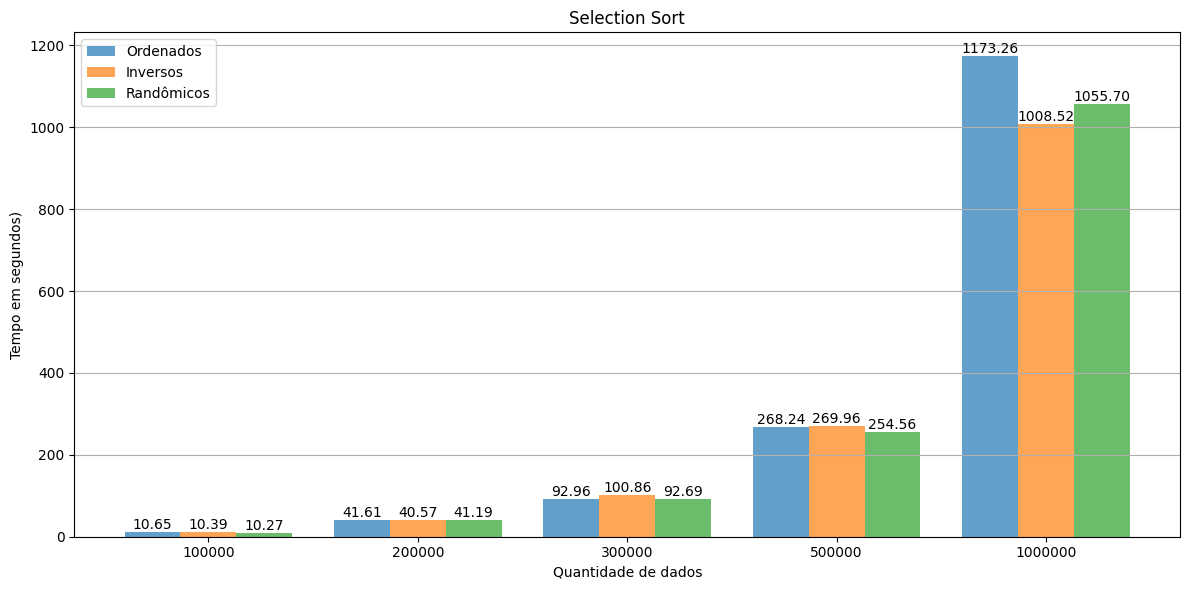

In [46]:
# Filtra o dataframe por tipo de dados
ord_data = selection_data[selection_data["type"] == 'ord']
inv_data = selection_data[selection_data["type"] == 'inv']
rdm_data = selection_data[selection_data["type"] == 'rdm']

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.4
group_spacing = 0.3

# Define o número de grupos. Cada grupo tem três colunas
num_groups = len(ord_data)
# Cria um array de x posições para os grupos
x_positions = np.arange(num_groups) * (3 * bar_width + group_spacing)

ax.bar(x_positions, ord_data['selection'], width=bar_width, label='Ordenados', align='center', alpha=0.7)
ax.bar(x_positions + bar_width, inv_data['selection'], width=bar_width, label='Inversos', align='center', alpha=0.7)
ax.bar(x_positions + 2 * bar_width, rdm_data['selection'], width=bar_width, label='Randômicos', align='center', alpha=0.7)

ax.set_xlabel('Quantidade de dados')
ax.set_ylabel('Tempo em segundos)')
ax.set_title('Selection Sort')

for x, y in zip(x_positions, ord_data['selection']):
    ax.text(x, y, f'{y / 1000:.2f}', ha='center', va='bottom')

for x, y in zip(x_positions + bar_width, inv_data['selection']):
    ax.text(x, y, f'{y / 1000:.2f}', ha='center', va='bottom')

for x, y in zip(x_positions + 2 * bar_width, rdm_data['selection']):
    ax.text(x, y, f'{y / 1000:.2f}', ha='center', va='bottom')

ax.set_xticks(x_positions + bar_width)
ax.set_xticklabels(selection_data["numdata"].unique())  # Set custom x-axis labels

# Use the custom tick formatter for the y-axis
ax.yaxis.set_major_formatter(thousands_formatter)

ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()

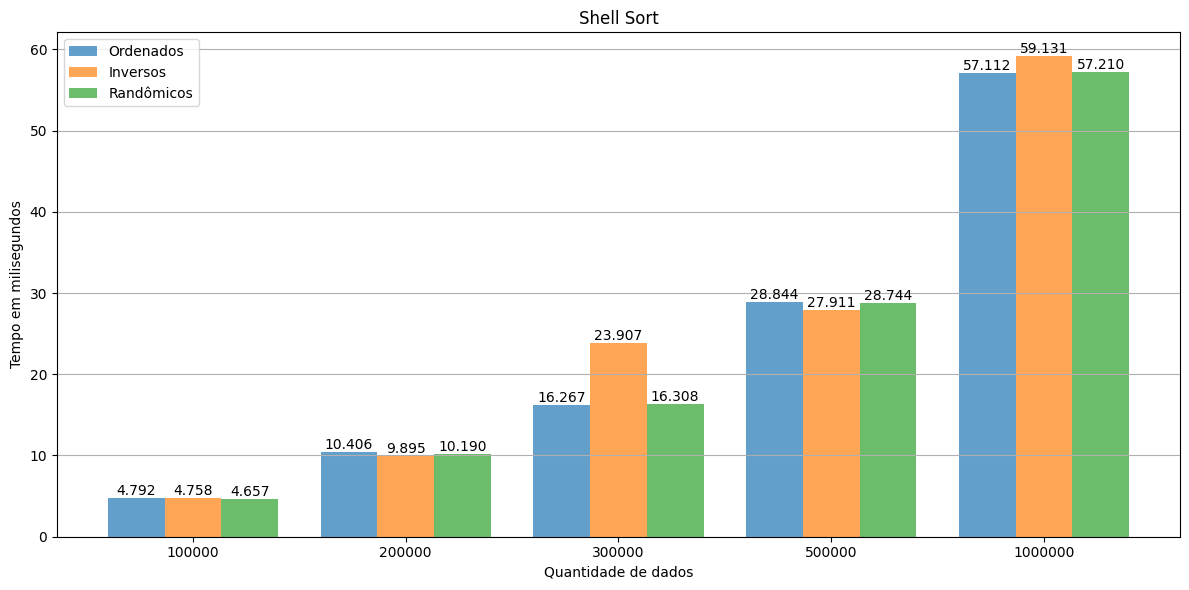

In [23]:
# Filtra o dataframe por tipo de dados
ord_data = shell_data[shell_data["type"] == 'ord']
inv_data = shell_data[shell_data["type"] == 'inv']
rdm_data = shell_data[shell_data["type"] == 'rdm']

plt.figure(figsize=(12, 6))

bar_width = 0.4
group_spacing = 0.3

# Define o número de grupos. Cada grupo tem três colunas
num_groups = len(ord_data)
# Cria um array de x posições para os grupos
x_positions = np.arange(num_groups) * (3 * bar_width + group_spacing)

plt.bar(x_positions, ord_data['shell'], width=bar_width, label='Ordenados', align='center', alpha=0.7)
plt.bar(x_positions + bar_width, inv_data['shell'], width=bar_width, label='Inversos', align='center', alpha=0.7)
plt.bar(x_positions + 2 * bar_width, rdm_data['shell'], width=bar_width, label='Randômicos', align='center', alpha=0.7)

plt.xlabel('Quantidade de dados')
plt.ylabel('Tempo em milisegundos')
plt.title('Shell Sort')

for x, y in zip(x_positions, ord_data['shell']):
    plt.text(x, y, f'{y:.3f}', ha='center', va='bottom')

for x, y in zip(x_positions + bar_width, inv_data['shell']):
    plt.text(x, y, f'{y:.3f}', ha='center', va='bottom')

for x, y in zip(x_positions + 2 * bar_width, rdm_data['shell']):
    plt.text(x, y, f'{y:.3f}', ha='center', va='bottom')

plt.xticks(x_positions + bar_width, shell_data["numdata"].unique())  # posiciona e nomeia as infos das colunas

plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()